In [ ]:
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt

csvpath = os.path.join("../project_1/California_Fire_Incidents.csv")
calfire = pd.read_csv(csvpath)

# Set display options to show all columns

pd.set_option('display.max_columns',None)


calfire


,AcresBurned,Active,AdminUnit,AirTankers,ArchiveYear,CalFireIncident,CanonicalUrl,ConditionStatement,ControlStatement,Counties,CountyIds,CrewsInvolved,Dozers,Engines,Extinguished,Fatalities,Featured,Final,FuelType,Helicopters,Injuries,Latitude,Location,Longitude,MajorIncident,Name,PercentContained,PersonnelInvolved,Public,SearchDescription,SearchKeywords,Started,Status,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,Updated,WaterTenders
0,257314.0,False,Stanislaus National Forest/Yosemite National Park,NaN,2013,True,/incidents/2013/8/17/rim-fire/,NaN,NaN,Tuolumne,55,NaN,NaN,NaN,2013-09-06T18:30:00Z,NaN,False,True,NaN,NaN,NaN,37.857000,3 miles east of Groveland along Hwy 120,-120.086000,False,Rim Fire,100.0,NaN,True,The Rim Fire was east of Groveland along Highw...,"Rim Fire, Stanislaus National Forest, Yosemite...",2013-08-17T15:25:00Z,Finalized,NaN,NaN,NaN,NaN,5fb18d4d-213f-4d83-a179-daaf11939e78,2013-09-06T18:30:00Z,NaN
1,30274.0,False,USFS Angeles National Forest/Los Angeles Count...,NaN,2013,True,/incidents/2013/5/30/powerhouse-fire/,NaN,NaN,Los Angeles,19,NaN,NaN,NaN,2013-06-08T18:30:00Z,NaN,False,True,NaN,NaN,NaN,34.585595,Angeles National Forest,-118.423176,False,Powerhouse Fire,100.0,NaN,True,The Powerhouse Fire burned in May and June 201...,"Powerhouse Fire, May 2013, June 2013, Angeles ...",2013-05-30T15:28:00Z,Finalized,NaN,NaN,NaN,NaN,bf37805e-1cc2-4208-9972-753e47874c87,2013-06-08T18:30:00Z,NaN
2,27531.0,False,CAL FIRE Riverside Unit / San Bernardino Natio...,NaN,2013,True,/incidents/2013/7/15/mountain-fire/,NaN,NaN,Riverside,33,NaN,NaN,NaN,2013-07-30T18:00:00Z,NaN,False,True,NaN,NaN,NaN,33.709500,Hwy 243 & Hwy 74 near Mountain Center,-116.728850,False,Mountain Fire,100.0,NaN,True,The Mountain Fire burned in July 2013 off High...,"Mountain Fire, July 2013, Highway 243, Highway...",2013-07-15T13:43:00Z,Finalized,NaN,NaN,NaN,NaN,a3149fec-4d48-427c-8b2c-59e8b79d59db,2013-07-30T18:00:00Z,NaN
3,27440.0,False,Tahoe National Forest,NaN,2013,False,/incidents/2013/8/10/american-fire/,NaN,NaN,Placer,31,NaN,NaN,NaN,2013-08-30T08:00:00Z,NaN,False,True,NaN,NaN,NaN,39.120000,"Deadwood Ridge, northeast of Foresthill",-120.650000,False,American Fire,100.0,NaN,True,The American Fire burned in August 2013 off De...,"American Fire, August 2013, Deadwood Ridge, Fo...",2013-08-10T16:30:00Z,Finalized,NaN,NaN,NaN,NaN,8213f5c7-34fa-403b-a4bc-da2ace6e6625,2013-08-30T08:00:00Z,NaN
4,24251.0,False,Ventura County Fire/CAL FIRE,NaN,2013,True,/incidents/2013/5/2/springs-fire/,Acreage has been reduced based upon more accur...,NaN,Ventura,56,47.0,8.0,117.0,2013-05-11T06:30:00Z,NaN,False,True,NaN,11.0,10.0,0.000000,Southbound Highway 101 at Camarillo Springs Ro...,0.000000,True,Springs Fire,100.0,2167.0,True,"The Springs Fire burned in May 2013, Southboun...","Springs Fire, May 2013, Highway 101, Camarillo...",2013-05-02T07:01:00Z,Finalized,6.0,10.0,NaN,NaN,46731fb8-3350-4920-bdf7-910ac0eb715c,2013-05-11T06:30:00Z,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1631,9.0,False,CAL FIRE / Riverside County Fire,NaN,2019,True,/incidents/2019/10/10/eagle-fire/,NaN,NaN,Riverside,33,NaN,NaN,NaN,2019-10-10T18:11:00Z,NaN,False,True,NaN,NaN,NaN,33.827979,"Eagle Canyon Rd. and Cajalco Rd., southwest of...",-117.499619,False,Eagle Fire,100.0,NaN,True,"The Eagle Fire started on October 10, 2019 nea...",NaN,2019-10-10T12:08:00Z,Finalized,NaN,NaN,NaN,NaN,6e93b252-99a3-4214-9921-238373b17535,2019-10-10T18:11:59.733Z,NaN
1632,2.0,False,CAL FIRE Nevada-Yuba-Placer Unit,NaN,2019,True,/incidents/2019/6/28/long-fire/,NaN,NaN,Nevada,29,NaN,NaN,NaN,2019-06-28T17:33:00Z,NaN,False,True,NaN,NaN,NaN,39.409722,"Off of Long Point Road and Old Mill Road, Sou...",-121.000556,False,Long Fire,100.0,NaN,True,"Long Fire started on June 28, 2019 off of Long...",NaN,2019-06-28T15:03:04Z,Finalized,NaN,NaN,NaN,NaN,b38c0563-b32

In [5]:
# Set display options to show all columns
pd.set_option('display.max_columns', None)
columns_to_drop = ['Active', 'Featured', 'Final', 'PercentContained', 'Public', 'SearchKeywords', 'Status']
calfire.drop(columns_to_drop, axis='columns', inplace=True)

In [6]:
# Convert datetime columns with UTC timezone parsing
calfire['Started'] = pd.to_datetime(calfire['Started'], format='ISO8601')
calfire['Updated'] = pd.to_datetime(calfire['Updated'], format='ISO8601')
calfire['Extinguished'] = pd.to_datetime(calfire['Extinguished'], format='ISO8601')
calfire['YearStarted'] = calfire['Started'].dt.year
calfire['MonthStarted'] = calfire['Started'].dt.month
calfire = calfire[calfire.YearStarted != 1969]

In [7]:
calfire.fillna({'AcresBurned': 0, 'AirTankers': 0, 'ConditionStatement':'', 'ControlStatement':'', 
                'CrewsInvolved': 0, 'Dozers': 0, 'Engines': 0, 'Extinguished': 0, 'Fatalities': 0,
               'FuelType':'', 'Helicopters': 0, 'Injuries': 0, 'PersonnelInvolved': 0,
               'SearchDescription':'', 'StructuresDamaged': 0, 'StructuresDestroyed': 0,
               'StructuresEvacuated': 0, 'StructuresThreatened': 0, 'WaterTenders': 0}, inplace=True)

C:\Users\denis\AppData\Local\Temp\ipykernel_9436\2958408208.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calfire.fillna({'AcresBurned': 0, 'AirTankers': 0, 'ConditionStatement':'', 'ControlStatement':'',
C:\Users\denis\AppData\Local\Temp\ipykernel_9436\2958408208.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calfire.fillna({'AcresBurned': 0, 'AirTankers': 0, 'ConditionStatement':'', 'ControlStatement':'',


In [8]:
calfire['AcresBurned'] = calfire['AcresBurned'].astype('int64')
calfire['AirTankers'] = calfire['AirTankers'].astype('int64')
calfire['CrewsInvolved'] = calfire['CrewsInvolved'].astype('int64')
calfire['Dozers'] = calfire['Dozers'].astype('int64')
calfire['Engines'] = calfire['Engines'].astype('int64')
calfire['Fatalities'] = calfire['Fatalities'].astype('int64')
calfire['Injuries'] = calfire['Injuries'].astype('int64')
calfire['Helicopters'] = calfire['Helicopters'].astype('int64')
calfire['PersonnelInvolved'] = calfire['PersonnelInvolved'].astype('int64')
calfire['StructuresDamaged'] = calfire['StructuresDamaged'].astype('int64')
calfire['StructuresDestroyed'] = calfire['StructuresDestroyed'].astype('int64')
calfire['StructuresEvacuated'] = calfire['StructuresEvacuated'].astype('int64')
calfire['StructuresThreatened'] = calfire['StructuresThreatened'].astype('int64')
calfire['WaterTenders'] = calfire['WaterTenders'].astype('int64')

C:\Users\denis\AppData\Local\Temp\ipykernel_9436\3858557207.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calfire['AcresBurned'] = calfire['AcresBurned'].astype('int64')
C:\Users\denis\AppData\Local\Temp\ipykernel_9436\3858557207.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calfire['AirTankers'] = calfire['AirTankers'].astype('int64')
C:\Users\denis\AppData\Local\Temp\ipykernel_9436\3858557207.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [12]:
# 1 Calculate the average burned area per firefighter : AcresBurned	/ PersonnelInvolved	

acres_per_firefighter = calfire['AcresBurned'] / calfire['PersonnelInvolved']

acres_per_firefighter.head()

0          inf
1          inf
2          inf
3          inf
4    11.191048
dtype: float64

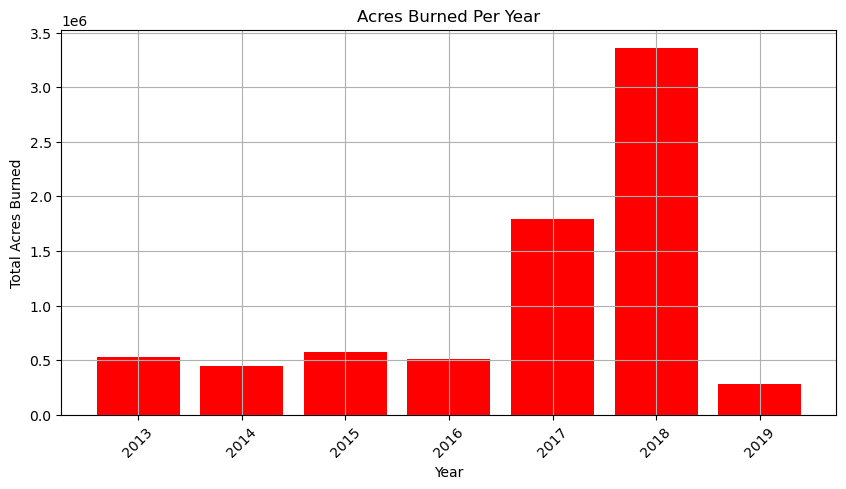

In [13]:
burns_by_year = calfire.groupby('ArchiveYear')['AcresBurned'].sum().reset_index()

plt.figure(figsize=(10,5))
plt.bar(burns_by_year["ArchiveYear"],burns_by_year["AcresBurned"], color = 'red')
plt.title('Acres Burned Per Year')
plt.xlabel('Year')
plt.ylabel('Total Acres Burned')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [14]:
result_df = pd.DataFrame({
    'AdminUnit': calfire['AdminUnit'],
    'ArchiveYear': calfire['ArchiveYear'],
    'acres_per_firefighter': acres_per_firefighter
})
result_df

,AdminUnit,ArchiveYear,acres_per_firefighter
0,Stanislaus National Forest/Yosemite National Park,2013,inf
1,USFS Angeles National Forest/Los Angeles Count...,2013,inf
2,CAL FIRE Riverside Unit / San Bernardino Natio...,2013,inf
3,Tahoe National Forest,2013,inf
4,Ventura County Fire/CAL FIRE,2013,11.191048
...,...,...,...
1631,CAL FIRE / Riverside County Fire,2019,inf
1632,CAL FIRE Nevada-Yuba-Placer Unit,2019,inf
1633,Yolo County Fire Protection District,2019,NaN
1634,Camp Pendleton Marine Corps Base,2019,NaN
